In [143]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

In [144]:
weather_data = pd.read_csv("data/testset.csv")
weather_data.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [145]:
weather_data.columns

Index(['datetime_utc', ' _conds', ' _dewptm', ' _fog', ' _hail',
       ' _heatindexm', ' _hum', ' _precipm', ' _pressurem', ' _rain', ' _snow',
       ' _tempm', ' _thunder', ' _tornado', ' _vism', ' _wdird', ' _wdire',
       ' _wgustm', ' _windchillm', ' _wspdm'],
      dtype='object')

In [146]:
weather_data.dtypes

datetime_utc     object
 _conds          object
 _dewptm        float64
 _fog             int64
 _hail            int64
 _heatindexm    float64
 _hum           float64
 _precipm       float64
 _pressurem     float64
 _rain            int64
 _snow            int64
 _tempm         float64
 _thunder         int64
 _tornado         int64
 _vism          float64
 _wdird         float64
 _wdire          object
 _wgustm        float64
 _windchillm    float64
 _wspdm         float64
dtype: object

In [147]:
weather_data.describe()

,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wgustm,_windchillm,_wspdm
count,100369.000000,100990.000000,100990.000000,29155.000000,100233.000000,0.0,1.007580e+05,100990.000000,100990.000000,100317.000000,100990.000000,100990.00000,96562.000000,86235.000000,1072.000000,579.000000,98632.000000
mean,15.741205,0.069690,0.000129,35.651710,57.909481,NaN,1.932331e+03,0.026260,0.000010,25.451269,0.009427,0.00002,2.402774,163.549974,37.671175,5.713817,7.678463
std,7.058587,0.254625,0.011345,5.015384,23.807771,NaN,3.183786e+05,0.159908,0.003147,8.482859,0.096633,0.00445,20.746028,120.002076,6.848666,1.203290,11.932157
min,-24.000000,0.000000,0.000000,26.800000,4.000000,NaN,-9.999000e+03,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,25.900000,2.100000,0.000000
25%,10.000000,0.000000,0.000000,31.700000,39.000000,NaN,1.002000e+03,0.000000,0.000000,19.000000,0.000000,0.00000,1.500000,50.000000,33.300000,4.900000,0.000000
50%,15.000000,0.000000,0.000000,35.100000,59.000000,NaN,1.008000e+03,0.000000,0.000000,27.000000,0.000000,0.00000,2.000000,160.000000,37.000000,6.100000,7.400000
75%,22.000000,0.000000,0.000000,39.200000,78.000000,NaN,1.014000e+03,0.000000,0.000000,32.000000,0.000000,0.00000,3.000000,270.000000,40.700000,6.800000,11.100000
max,75.000000,1.000000,1.000000,73.600000,243.000000,NaN,1.010614e+08,1.000000,1.000000,90.000000,1.000000,1.00000,6436.000000,960.000000,92.600000,7.300000,1514.900000


In [148]:
weather_data.drop([' _precipm', 'datetime_utc', ' _conds', ' _wdire'], axis = 1, inplace = True)

In [149]:
weather_data.mode()

,_dewptm,_fog,_hail,_heatindexm,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wgustm,_windchillm,_wspdm
0,26.0,0,0,34.5,100.0,1014.0,0,0,29.0,0,0,2.0,0.0,37.0,7.3,0.0


In [150]:
weather_data.isnull().any()

_dewptm         True
_fog           False
_hail          False
_heatindexm     True
_hum            True
_pressurem      True
_rain          False
_snow          False
_tempm          True
_thunder       False
_tornado       False
_vism           True
_wdird          True
_wgustm         True
_windchillm     True
_wspdm          True
dtype: bool

In [151]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy = 'mean')

weather_data = pd.DataFrame(imp.fit_transform(weather_data), columns = weather_data.columns)

weather_data.head()

,_dewptm,_fog,_hail,_heatindexm,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wgustm,_windchillm,_wspdm
0,9.0,0.0,0.0,35.65171,27.0,1010.0,0.0,0.0,30.0,0.0,0.0,5.000000,280.0,37.671175,5.713817,7.400000
1,10.0,0.0,0.0,35.65171,32.0,-9999.0,0.0,0.0,28.0,0.0,0.0,2.402774,0.0,37.671175,5.713817,7.678463
2,11.0,0.0,0.0,35.65171,44.0,-9999.0,0.0,0.0,24.0,0.0,0.0,2.402774,0.0,37.671175,5.713817,7.678463
3,10.0,0.0,0.0,35.65171,41.0,1010.0,0.0,0.0,24.0,0.0,0.0,2.000000,0.0,37.671175,5.713817,7.678463
4,11.0,0.0,0.0,35.65171,47.0,1011.0,0.0,0.0,23.0,0.0,0.0,1.200000,0.0,37.671175,5.713817,0.000000


In [152]:
weather_data.columns

Index([' _dewptm', ' _fog', ' _hail', ' _heatindexm', ' _hum', ' _pressurem',
       ' _rain', ' _snow', ' _tempm', ' _thunder', ' _tornado', ' _vism',
       ' _wdird', ' _wgustm', ' _windchillm', ' _wspdm'],
      dtype='object')

In [153]:
weather_data.isnull().any()

_dewptm        False
_fog           False
_hail          False
_heatindexm    False
_hum           False
_pressurem     False
_rain          False
_snow          False
_tempm         False
_thunder       False
_tornado       False
_vism          False
_wdird         False
_wgustm        False
_windchillm    False
_wspdm         False
dtype: bool

<h2>Visualizations</h2>

<h2>Modeling</h2>

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [155]:
X = weather_data.drop(columns = [' _hum'], axis = 1)
y = weather_data[' _hum']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.8)

In [156]:
linear_reg = LinearRegression()
linear_reg = linear_reg.fit(x_train, y_train)

In [157]:
y_predictions = linear_reg.predict(x_test)
y_predictions

array([17.44342359, 44.23745379, 90.10138899, ..., 77.19613324,
       49.02094216, 83.11532215])

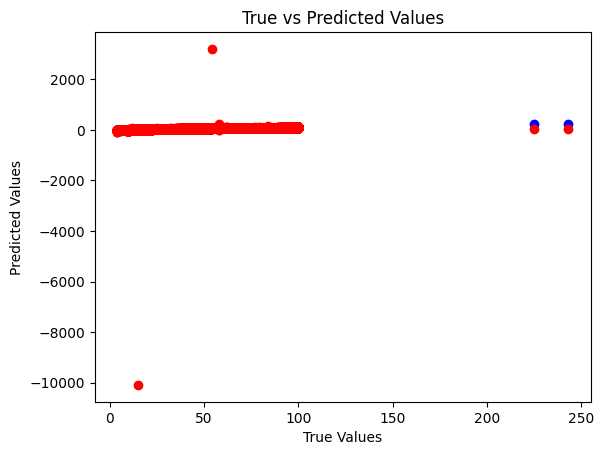

In [158]:
plt.scatter(y_test, y_test, color = "blue")
plt.scatter(y_test, y_predictions, color = "red")
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()

/tmp/ipykernel_148455/953443139.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  plot = sb.barplot(data = feature_importances, orient = 'h', palette = 'rocket_r')


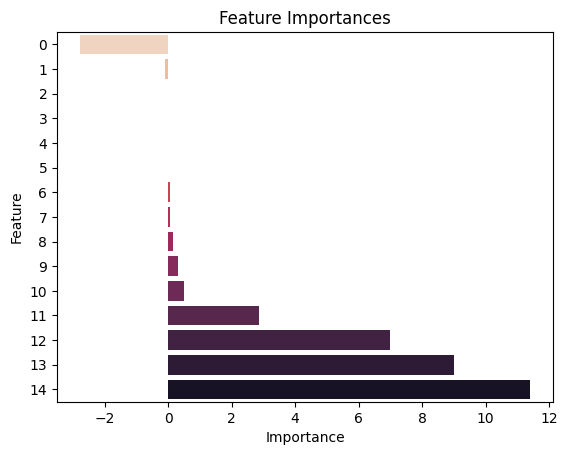

In [163]:
feature_importances = linear_reg.coef_
indices = np.argsort(feature_importances)
feature_importances = feature_importances[indices]
plot = sb.barplot(data = feature_importances, orient = 'h', palette = 'rocket_r')

plt.title('Feature Importances')
plt.ylabel('Feature')
plt.xlabel('Importance')
plt.show()

In [160]:
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score
evs = explained_variance_score(y_true = y_test, y_pred = y_predictions)
mae = mean_absolute_error(y_true = y_test, y_pred = y_predictions)
mse = mean_squared_error(y_true = y_test, y_pred = y_predictions)
r2 = r2_score(y_true = y_test, y_pred = y_predictions)

print(f"Explained Variance Score: {evs}")
print(f"Mean Absolute Error Score: {mae}")
print(f"Mean Squared Error Score: {mse}")
print(f"R2 Score: {r2}")

Explained Variance Score: -1.5653932107631343
Mean Absolute Error Score: 5.560087811908721
Mean Squared Error Score: 1440.3693607675204
R2 Score: -1.5653933805862592
